# Preprocessing(1)

자연어 분석
- 형태소 분석
- 구문 분석
- 의미 분석
- 담화 분석 
- 중의성 해소

응용 기술
- 검색
- 온라인광고
- 자동번역
- 감정분석
- 음성인식
- 맞춤법 검사

large scale 차원에서  벡터화

- 온톨로지 : 사람이 직접 사전화 한다? 그래서 제약사항이 많은가봄

word embeding

- 딥러닝 : 번역, 

문장 -> 문단 -> 담화

최소단위 : 문장

최대단위 : text

- KoNLPy
- NLTK (Natural Language Tool Kit)

## Tokenizing

In [5]:
import nltk

In [6]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [111]:
import sqlite3
con = sqlite3.connect("bot2.db")
cur = con.cursor()

In [223]:
cur.execute("""
    select content from table2 order by id ASC
    LIMIT 0,2
""")

corpus = [_[0] for _ in cur.fetchall()]

In [225]:
len(corpus[0]), len(corpus.split()[0]), len(corpus.splitlines()[0]) #글자수, 빈칸으로 나눈 수, 엔터로 나눈 수

AttributeError: 'list' object has no attribute 'split'

In [222]:
from nltk.tokenize import sent_tokenize
len(word_tokenize(corpus)), len(sent_tokenize(corpus)) # 이거 함수들 어떻게 사용하는건지 알아보기

(14873, 747)

In [41]:
corpus[1].splitlines()[0]

'트럼프 "미 해군, 이란 드론 격추"…이란 "아무 정보 없다"'

In [43]:
sent_tokenize(corpus[1])[0]

'트럼프 "미 해군, 이란 드론 격추"…이란 "아무 정보 없다"\n美, \'호르무즈 호위 연합체\' 결성하며 강성대응 예고\n호르무즈 해협 © 뉴스1\n\n(서울=뉴스1) 한상희 기자 = 세계 최대 원유 수송로인 호르무즈 해협을 둘러싼 긴장이 30여년 만에 최고조에 달했다.'

In [61]:
sent_tokenize("""
    안녕하세여. 수업듣기 싫네요!!
    왜죠..... 왜
""")

['\n    안녕하세여.', '수업듣기 싫네요!!', '왜죠.....& 왜']

In [47]:
from string import punctuation
punctuation  # 구두점들

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [68]:
from nltk.tokenize import word_tokenize
word_tokenize("""술 한잔 마셨습니다. 영화가 잘 안되도 좋습니다...
              하지만 엄복동 하나만 기억해주세요. 진심을 다해 전합니다. 
              영화가 별로일 수 있습니다. '밤'낮으로 고민하고 연기했습니다. 
              최선을 다해고, 열심히 했습니다. 저의 진심이 느껴지길 바랍니다""")  # 어절(word 단위로 쪼개준다

['술',
 '한잔',
 '마셨습니다',
 '.',
 '영화가',
 '잘',
 '안되도',
 '좋습니다',
 '...',
 '하지만',
 '엄복동',
 '하나만',
 '기억해주세요',
 '.',
 '진심을',
 '다해',
 '전합니다',
 '.',
 '영화가',
 '별로일',
 '수',
 '있습니다',
 '.',
 "'",
 "밤'낮으로",
 '고민하고',
 '연기했습니다',
 '.',
 '최선을',
 '다해고',
 ',',
 '열심히',
 '했습니다',
 '.',
 '저의',
 '진심이',
 '느껴지길',
 '바랍니다']

In [71]:
from nltk.tokenize import TweetTokenizer
word_tokenize("you need Pthon =)")
TweetTokenizer().tokenize("you need pthon=);")
TweetTokenizer().tokenize("You need python =):()")

['You', 'need', 'python', '=)', ':(', ')']

In [78]:
import re
from nltk.tokenize import regexp_tokenize
pattern = re.compile(r"\b({가-힣}+)\b")
regexp_tokenize("wddd ㄱㄱ ㄷㄷ ㅋㅋ 한#%@글", pattern)

[]

In [79]:
re.sub(r"[^ ㄱ-ㅎ])

SyntaxError: EOL while scanning string literal (<ipython-input-79-45a52047ab70>, line 1)

In [241]:
from nltk import Text

text = Text(word_tokenize(corpus[0]))

In [83]:
text.vocab().B(), text.vocab().N()# N: 전체 개수 B: 유니크한 애들

(290, 435)

In [84]:
text.vocab().most_common(30)

[('.', 18),
 (',', 15),
 ('“', 11),
 ('”', 11),
 ('대표', 6),
 ('고', 6),
 ('말했다', 5),
 ('있다', 4),
 ('해임건의안', 4),
 ('국방장관', 4),
 ('19일', 3),
 ('오전', 3),
 ('열린', 3),
 ('하고', 3),
 ('[', 3),
 (']', 3),
 ('6월', 3),
 ('국회', 3),
 ('전날', 3),
 ('여야', 3),
 ('원내대표는', 3),
 ('이날', 3),
 ('며', 3),
 ('정', 3),
 ('바른미래당', 3),
 ('수', 3),
 ('나경원', 2),
 ('자유한국당', 2),
 ('원내대표가', 2),
 ('서울', 2)]

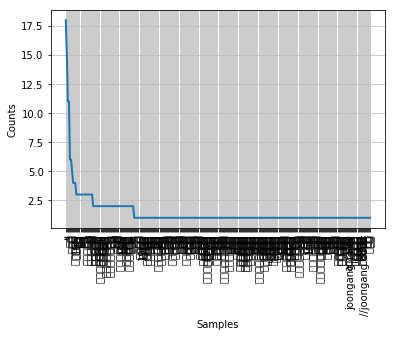

In [87]:
text.plot()

# Empirical Law

In [240]:
text.vocab()

FreqDist({' ': 1})

In [98]:
text.vocab().freq("말했다")

0.011494252873563218

In [101]:
ratio =0.0
for _ in [_[0] for _ in text.vocab().most_common()]:
    ratio += text.vocab().freq(_)
    print(text.vocab().freq(_))
print(ratio)

0.041379310344827586
0.034482758620689655
0.02528735632183908
0.02528735632183908
0.013793103448275862
0.013793103448275862
0.011494252873563218
0.009195402298850575
0.009195402298850575
0.009195402298850575
0.006896551724137931
0.006896551724137931
0.006896551724137931
0.006896551724137931
0.006896551724137931
0.006896551724137931
0.006896551724137931
0.006896551724137931
0.006896551724137931
0.006896551724137931
0.006896551724137931
0.006896551724137931
0.006896551724137931
0.006896551724137931
0.006896551724137931
0.006896551724137931
0.004597701149425287
0.004597701149425287
0.004597701149425287
0.004597701149425287
0.004597701149425287
0.004597701149425287
0.004597701149425287
0.004597701149425287
0.004597701149425287
0.004597701149425287
0.004597701149425287
0.004597701149425287
0.004597701149425287
0.004597701149425287
0.004597701149425287
0.004597701149425287
0.004597701149425287
0.004597701149425287
0.004597701149425287
0.004597701149425287
0.004597701149425287
0.0045977011494

#### Zipf's Law

수많은 데이터중 어떤 피처를 사용할거냐


In [249]:
cur.close()
con.close()

In [272]:
import sqlite3
con = sqlite3.connect("bot2.db")
cur = con.cursor()

cur.execute("""
    select content from table2 order by id ASC
    LIMIT 0,2
""")

In [268]:
corpus = [_[0] for _ in cur.fetchall()]

In [270]:
corpus[0]

"나경원 자유한국당 원내대표가 19일 오전 서울 여의도 국회에서 열린 원내대책회의에서 모두발언을 하고 있다. [뉴스1]\n\n6월 임시국회가 ‘빈손 국회’로 끝날 가능성이 커졌다. 19일은 6월 임시국회 마지막 날이다.\n\n전날 문재인 대통령과 여야 5당 대표 회동에서도 추가경정예산안(추경) 처리와 정경두 국방부장관 해임건의안 상정 등을 두고 접점을 찾지 못했다. 더불어민주당과 자유한국당은 19일 오후 2시 각각 의원총회를 열어 대응 방안을 논의한다.\n\n나경원 한국당 원내대표는 이날 오전 당 원내대책회의에서 “6월 임시국회가 이 모양에 이르게 된 것에 안타까움을 넘어 자괴감을 느낀다”며 “여당은 두 가지 중 하나를 선택해 달라”고 말했다. 나 원내대표는 “오늘 북한 목선 국정조사를 받으면 나머지 법안과 추경안을 심사해 할 건 하고 뺄 건 빼겠다”며 “아니면 다음 주에 투 포인트 국회 본회의를 열어서 하루는 정 장관 해임건의안을 보고하고, 하루는 법안처리와 표결을 하자”고 제안했다.\n\n오신환 바른미래당 원내대표가 18일 오전 서울 여의도 국회에서 열린 제50차 원내정책회의에서 모두발언을 하고 있다. [뉴스1]\n오신환 바른미래당 원내대표도 “민생법안, 추가경정예산안, 일본의 수출규제 철회 촉구 결의안, 국방장관 해임건의안 표결을 위한 원포인트 임시국회를 다음주 중에 여야 합의로 개최해야 한다”고 말했다. 오 원내대표는 이날 당 최고위원회의에서 “일본 경제 보복에 맞서 일치단결하는 모습을 보여야 할 위중한 시기에 국회가 아무런 결과물을 내놓지 못하고 갈등ㆍ분열만 지속한다면, 일본이 우리나라를 어떻게 생각하겠는가”라며 “더불어민주당과 자유한국당의 긍정적인 답변을 기다리겠다”고 했다.\n\n정동영 민주평화당 대표는 전날 청와대 회동에서 정경두 국방장관 해임건의안은 여당이 양보해 국회 결정에 맡기고, 야당은 민생법안ㆍ추경안 처리에 협조해야 한다고 말했다. 한국당과 바른미래당은 이날 정 대표의 중재안에 동의한다며 여당의 양보를 촉구했다.\n문재인 대통령이 18일

In [273]:
corpus = " "
for _ in cur.fetchall():
    corpus += _[0]

In [275]:
corpus

' 나경원 자유한국당 원내대표가 19일 오전 서울 여의도 국회에서 열린 원내대책회의에서 모두발언을 하고 있다. [뉴스1]\n\n6월 임시국회가 ‘빈손 국회’로 끝날 가능성이 커졌다. 19일은 6월 임시국회 마지막 날이다.\n\n전날 문재인 대통령과 여야 5당 대표 회동에서도 추가경정예산안(추경) 처리와 정경두 국방부장관 해임건의안 상정 등을 두고 접점을 찾지 못했다. 더불어민주당과 자유한국당은 19일 오후 2시 각각 의원총회를 열어 대응 방안을 논의한다.\n\n나경원 한국당 원내대표는 이날 오전 당 원내대책회의에서 “6월 임시국회가 이 모양에 이르게 된 것에 안타까움을 넘어 자괴감을 느낀다”며 “여당은 두 가지 중 하나를 선택해 달라”고 말했다. 나 원내대표는 “오늘 북한 목선 국정조사를 받으면 나머지 법안과 추경안을 심사해 할 건 하고 뺄 건 빼겠다”며 “아니면 다음 주에 투 포인트 국회 본회의를 열어서 하루는 정 장관 해임건의안을 보고하고, 하루는 법안처리와 표결을 하자”고 제안했다.\n\n오신환 바른미래당 원내대표가 18일 오전 서울 여의도 국회에서 열린 제50차 원내정책회의에서 모두발언을 하고 있다. [뉴스1]\n오신환 바른미래당 원내대표도 “민생법안, 추가경정예산안, 일본의 수출규제 철회 촉구 결의안, 국방장관 해임건의안 표결을 위한 원포인트 임시국회를 다음주 중에 여야 합의로 개최해야 한다”고 말했다. 오 원내대표는 이날 당 최고위원회의에서 “일본 경제 보복에 맞서 일치단결하는 모습을 보여야 할 위중한 시기에 국회가 아무런 결과물을 내놓지 못하고 갈등ㆍ분열만 지속한다면, 일본이 우리나라를 어떻게 생각하겠는가”라며 “더불어민주당과 자유한국당의 긍정적인 답변을 기다리겠다”고 했다.\n\n정동영 민주평화당 대표는 전날 청와대 회동에서 정경두 국방장관 해임건의안은 여당이 양보해 국회 결정에 맡기고, 야당은 민생법안ㆍ추경안 처리에 협조해야 한다고 말했다. 한국당과 바른미래당은 이날 정 대표의 중재안에 동의한다며 여당의 양보를 촉구했다.\n문재인 대통령이 18

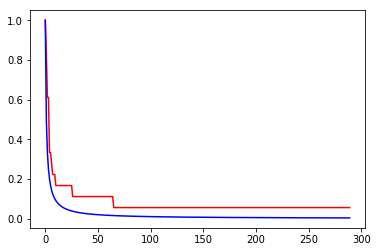

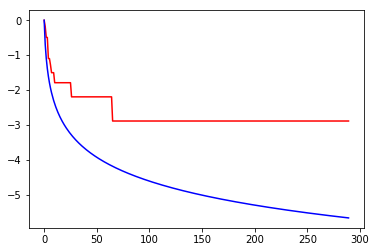

In [276]:
import matplotlib.pyplot as plt 
from math import log

token = [_[0] for _ in sorted(text.vocab().items(), key=lambda x:x[1], reverse=True)]
freq = [_[1]/text.vocab().most_common(1)[0][1] 
        for _ in sorted(text.vocab().items(), key=lambda x:x[1], reverse=True)]

_freq = [log(_) for _ in freq]
rank = [1/(_+1) for _ in range(len(token))]
_rank = [log(_) for _ in rank]

plt.plot([i for i in range(len(token))], freq, "r-")
plt.plot([i for i in range(len(token))], rank, "b-")
plt.show()

plt.plot([i for i in range(len(token))], _freq, "r-")
plt.plot([i for i in range(len(token))], _rank, "b-")
plt.show()


# Heaps' Law

In [281]:
K = 30 #10 -100
B = 0.4 #0.4 - 0.6

unique = list()
total = list()
heaps = list()
largeText = ""

for _ in corpus:
    largeText += _
    text = Text(largeText)
    unique.append(text.vocab().B())
    total.append(text.vocab().N())
    heaps.append(K*text.vocab().N()**B)

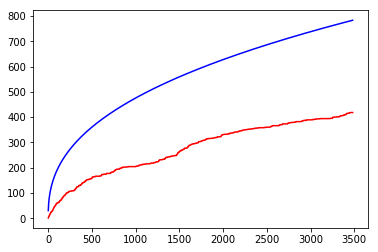

In [282]:
plt.plot(total, unique, "r-")
plt.plot(total, heaps, "b-")
plt.show()

# n-gram

- 언어학지식 없이 빈도와 통계학 지식을 활용할수 있다
- 굉장히 많은 feature를 생산해 내기는 한다.
- 어간을 찾는데 가장 많이쓰는 approach 중 하나

- 여태까지 나온 문자들로 다음 문자를 추측하는것?

- 실제 쓰일 수가 없다
- 패턴이 나올 가지수가 너무 많다.
- 특정 패턴에 대한 빈도가 너무 작다
- corpus를 수집하는것이 가장 중요(data라고 볼수 잇다)
- corpus : 기본적으로  밸런스가 맞춰져야함
    



## 어절단위의 n-gram 

sentence = "Life is too short, You need Python"

N=2 
- Python?
- P(Python|need, You, short, too, is, Life)

- P(Python|need)
- P(need|You)

N=3
- P(Python|need, You)
- P(need|You) P(Python|need)

술 한잔 마셨습니다.


- 웹에서 받은 데이터  도메인 모르면 생소한 단어 있을거 얼만큼의 단어가 
    index로 사용될지 모른다고 하면 자주나오는 쌍들을 찾아낼때 유용하게 쓰일 것
- 띄어쓰기가 언제 나와야하는지 판단할 때 사용될수도

내가 어간을 모를때 사용할 수 있는 방법이 n-gram이다. 

but

엄청나게 많은 쌍을 만들어낸다

밑에꺼 보면 '나 경' 을 봤을때 뒤에 올게 뭔지 그뒤에 와야할 적절한 것은 뭔지를 확률로 계산해서 찾아내는 것

In [181]:
sentence = "Life is too short, You need Python"

def eojeol(sentence, N=2): #어절끼리의 쌍
    tokens = word_tokenize(sentence) #토근 만들기
    ngram = list()
    for i in range(len(tokens)-(N-1)):
        #ngram.append(" ".join(tokens[i:i+N]))
        ngram.append(tuple(tokens[i:i+N]))
    return ngram

def umjeol(token, N=2): #음절 끼리의 쌍
    tokens = list(token)
    ngram = list()
    for i in range(len(tokens)-(N-1)):
        ngram.append(" ".join(tokens[i:i+N]))
        #ngram.append(tuple(tokens[i:i+N]))
    return ngram

eojeol(sentence,3)
umjeol(corpus[0].splitlines()[0])

['나 경',
 '경 원',
 '원  ',
 '  자',
 '자 유',
 '유 한',
 '한 국',
 '국 당',
 '당  ',
 '  원',
 '원 내',
 '내 대',
 '대 표',
 '표 가',
 '가  ',
 '  1',
 '1 9',
 '9 일',
 '일  ',
 '  오',
 '오 전',
 '전  ',
 '  서',
 '서 울',
 '울  ',
 '  여',
 '여 의',
 '의 도',
 '도  ',
 '  국',
 '국 회',
 '회 에',
 '에 서',
 '서  ',
 '  열',
 '열 린',
 '린  ',
 '  원',
 '원 내',
 '내 대',
 '대 책',
 '책 회',
 '회 의',
 '의 에',
 '에 서',
 '서  ',
 '  모',
 '모 두',
 '두 발',
 '발 언',
 '언 을',
 '을  ',
 '  하',
 '하 고',
 '고  ',
 '  있',
 '있 다',
 '다 .',
 '.  ',
 '  [',
 '[ 뉴',
 '뉴 스',
 '스 1',
 '1 ]']

In [163]:
from collections import defaultdict

freg = defaultdict(int)
for _ in eojeol(corpus[0]):
    freg[_]+=1

In [170]:
freg
sorted(freg.items(), key=lambda x:x[1], reverse=True)[:10]

[(('”', '고'), 6),
 (('말했다', '.'), 5),
 (('고', '말했다'), 4),
 (('대표', ','), 4),
 (('있다', '.'), 3),
 (('.', '['), 3),
 (('”', '며'), 3),
 (('며', '“'), 3),
 (('오전', '서울'), 2),
 (('서울', '여의도'), 2)]

In [ ]:
[_ for _ in ]

In [177]:
freg[('”', '고')]/sum(freg.values()) *\ #('”', '고')가 나올 확률
freg[('말했다', '.')]/freg[('”', '고')] 
# 

0.01152073732718894


join, comple

# WPM
Word Piece Model
- 어간을 어떻게 추출할지
- 하나의 단어를 내부 단어들로 분리하는 분리모델


## BPE 를 기반으로 만들음
Byte Pair Encoding (Digram Coding)


In [287]:
from nltk.corpus import stopwords

In [288]:
stopwords.open()

TypeError: open() missing 1 required positional argument: 'file'

In [289]:
print(stopwords.open("english").read())

i
me
my
myself
we
our
ours
ourselves
you
you're
you've
you'll
you'd
your
yours
yourself
yourselves
he
him
his
himself
she
she's
her
hers
herself
it
it's
its
itself
they
them
their
theirs
themselves
what
which
who
whom
this
that
that'll
these
those
am
is
are
was
were
be
been
being
have
has
had
having
do
does
did
doing
a
an
the
and
but
if
or
because
as
until
while
of
at
by
for
with
about
against
between
into
through
during
before
after
above
below
to
from
up
down
in
out
on
off
over
under
again
further
then
once
here
there
when
where
why
how
all
any
both
each
few
more
most
other
some
such
no
nor
not
only
own
same
so
than
too
very
s
t
can
will
just
don
don't
should
should've
now
d
ll
m
o
re
ve
y
ain
aren
aren't
couldn
couldn't
didn
didn't
doesn
doesn't
hadn
hadn't
hasn
hasn't
haven
haven't
isn
isn't
ma
mightn
mightn't
mustn
mustn't
needn
needn't
shan
shan't
shouldn
shouldn't
wasn
wasn't
weren
weren't
won
won't
wouldn
wouldn't



# Normalization

In [392]:
tokens = {
    "l o w </w>" : 5, #끝인걸 알려주기 위해서 /w치고 이게 5번 나왔음
    "l o w e s t </w>" : 2,
    "n e w e r </w>" : 6,
    "r i d e r </w>" : 3
}
tokens = {
    "아 버 지 가 </w>" : 5, #끝인걸 알려주기 위해서 /w치고 이게 5번 나왔음
    "아 버 지 께 서 </w>" : 2,
    "아 버 지 를 </w>" : 6,
    "아 버 지 는 </w>" : 3
}

K = max(tokens.values())
for _ in range(100):
    maxKey = findBigram(tokens)
    tokens = mergeMaxKey(maxKey, tokens, K)
    
pattern = r"[가-힣A-Za-z\/\<\>]{2,}"
result = list()
for _ in tokens:
    result.extend([_ for _ in re.findall(pattern, _) if _ != "</w>"])
print(set(result))

{'아버지'}


In [390]:
def findBigram(tokens):
    ngram = defaultdict(int)
    for token, freq in tokens.items():
        syllables = token.split()
        for i in range(len(syllables)-1):
            ngram[tuple(syllables[i:i+2])] += freq
    return ngram

In [385]:
def mergeMaxKey(ngram, tokens, K):
    maxKey = max(ngram, key=ngram.get)
    maxValue = max(ngram.values())
    newTokens = dict()
    for token, freq in tokens.items():
        newTokens[re.sub(" ".join(maxKey), "".join(maxKey), token)
                 if maxValue > K else token] = freq
    #print(maxKey)
    return newTokens